#PORTFOLIO ASSIGNMENT
#REGRESSION TASK

###Import Libraries

Libraries necessary for the project are imported here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#About the Dataset


 **Landslide Dataset Overview**  
This dataset captures environmental and geophysical factors influencing landslides, including rainfall, slope angle, soil properties, vegetation cover, earthquake activity, and proximity to water sources.  

## **Columns**
- **Rainfall_mm**: Total rainfall (mm) before the landslide.  
- **Slope_Angle**: Steepness of the slope (degrees).  
- **Soil_Saturation**: Soil water saturation (0 to 1).  
- **Vegetation_Cover**: Ground vegetation cover (0 to 1).  
- **Earthquake_Activity**: Recent earthquake magnitude (Richter scale).  
- **Proximity_to_Water**: Distance to the nearest water body (0 to 1).  
- **Landslide**: `1` if a landslide occurred, `0` otherwise.  
- **Soil_Type_Gravel / Sand / Silt**: Binary indicators for soil type.  

## **Purpose**
This dataset aids in understanding landslide risks by analyzing environmental triggers, supporting predictive modeling and disaster prevention efforts.


#Load the Dataset

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Name of the dataset
file_path = "landslide_dataset.csv"

# Retrieve dataset from kaggle
dataset = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "rajumavinmar/landslide-dataset",
    file_path
)
dataset.info()

100%|██████████| 172k/172k [00:00<00:00, 2.85MB/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rainfall_mm          2000 non-null   float64
 1   Slope_Angle          2000 non-null   float64
 2   Soil_Saturation      2000 non-null   float64
 3   Vegetation_Cover     2000 non-null   float64
 4   Earthquake_Activity  2000 non-null   float64
 5   Proximity_to_Water   2000 non-null   float64
 6   Landslide            2000 non-null   int64  
 7   Soil_Type_Gravel     2000 non-null   int64  
 8   Soil_Type_Sand       2000 non-null   int64  
 9   Soil_Type_Silt       2000 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 156.4 KB


In [3]:
# view first few columns of dataset
dataset.head(5)

,Rainfall_mm,Slope_Angle,Soil_Saturation,Vegetation_Cover,Earthquake_Activity,Proximity_to_Water,Landslide,Soil_Type_Gravel,Soil_Type_Sand,Soil_Type_Silt
0,206.181018,58.275001,0.892798,0.339463,4.390047,0.099975,1,0,0,0
1,218.887334,36.679801,0.657147,0.360355,4.141029,0.832443,1,0,0,1
2,181.850867,31.363874,0.673362,0.221697,5.311891,0.023062,1,0,0,1
3,228.716199,38.995134,0.618666,0.489502,4.581928,0.785176,1,0,0,1
4,179.951067,42.998205,0.836966,0.118580,5.518862,0.450499,1,0,0,0


In [4]:
# view last few rows of dataset
dataset.tail(5)

,Rainfall_mm,Slope_Angle,Soil_Saturation,Vegetation_Cover,Earthquake_Activity,Proximity_to_Water,Landslide,Soil_Type_Gravel,Soil_Type_Sand,Soil_Type_Silt
1995,195.650778,27.084662,0.567332,0.556801,3.472594,1.323190,0,1,0,0
1996,197.339684,22.715510,0.037470,0.517580,0.673632,1.921158,0,1,0,0
1997,75.759674,6.631750,0.266207,0.925309,0.306690,1.944876,0,0,1,0
1998,50.919297,16.603380,0.014794,0.954346,2.073630,1.111595,0,1,0,0
1999,188.083126,28.372795,0.093188,0.516938,3.959366,1.043214,0,1,0,0


#Data Cleansing

In [5]:
# The data is cleaned already
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rainfall_mm          2000 non-null   float64
 1   Slope_Angle          2000 non-null   float64
 2   Soil_Saturation      2000 non-null   float64
 3   Vegetation_Cover     2000 non-null   float64
 4   Earthquake_Activity  2000 non-null   float64
 5   Proximity_to_Water   2000 non-null   float64
 6   Landslide            2000 non-null   int64  
 7   Soil_Type_Gravel     2000 non-null   int64  
 8   Soil_Type_Sand       2000 non-null   int64  
 9   Soil_Type_Silt       2000 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 156.4 KB


##Handling Missing Values

In [6]:
# checking for missing values
dataset.isnull().sum()

,0
Rainfall_mm,0
Slope_Angle,0
Soil_Saturation,0
Vegetation_Cover,0
Earthquake_Activity,0
Proximity_to_Water,0
Landslide,0
Soil_Type_Gravel,0
Soil_Type_Sand,0
Soil_Type_Silt,0


##Cleaned Dataset

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rainfall_mm          2000 non-null   float64
 1   Slope_Angle          2000 non-null   float64
 2   Soil_Saturation      2000 non-null   float64
 3   Vegetation_Cover     2000 non-null   float64
 4   Earthquake_Activity  2000 non-null   float64
 5   Proximity_to_Water   2000 non-null   float64
 6   Landslide            2000 non-null   int64  
 7   Soil_Type_Gravel     2000 non-null   int64  
 8   Soil_Type_Sand       2000 non-null   int64  
 9   Soil_Type_Silt       2000 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 156.4 KB


In [8]:
dataset.head()

,Rainfall_mm,Slope_Angle,Soil_Saturation,Vegetation_Cover,Earthquake_Activity,Proximity_to_Water,Landslide,Soil_Type_Gravel,Soil_Type_Sand,Soil_Type_Silt
0,206.181018,58.275001,0.892798,0.339463,4.390047,0.099975,1,0,0,0
1,218.887334,36.679801,0.657147,0.360355,4.141029,0.832443,1,0,0,1
2,181.850867,31.363874,0.673362,0.221697,5.311891,0.023062,1,0,0,1
3,228.716199,38.995134,0.618666,0.489502,4.581928,0.785176,1,0,0,1
4,179.951067,42.998205,0.836966,0.118580,5.518862,0.450499,1,0,0,0


In [9]:
dataset.tail()

,Rainfall_mm,Slope_Angle,Soil_Saturation,Vegetation_Cover,Earthquake_Activity,Proximity_to_Water,Landslide,Soil_Type_Gravel,Soil_Type_Sand,Soil_Type_Silt
1995,195.650778,27.084662,0.567332,0.556801,3.472594,1.323190,0,1,0,0
1996,197.339684,22.715510,0.037470,0.517580,0.673632,1.921158,0,1,0,0
1997,75.759674,6.631750,0.266207,0.925309,0.306690,1.944876,0,0,1,0
1998,50.919297,16.603380,0.014794,0.954346,2.073630,1.111595,0,1,0,0
1999,188.083126,28.372795,0.093188,0.516938,3.959366,1.043214,0,1,0,0


#Exploratory Data Analysis

In [10]:
# Summary Statistics of Data
dataset.describe()

,Rainfall_mm,Slope_Angle,Soil_Saturation,Vegetation_Cover,Earthquake_Activity,Proximity_to_Water,Landslide,Soil_Type_Gravel,Soil_Type_Sand,Soil_Type_Silt
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.0000,2000.00000
mean,176.688462,29.985404,0.540316,0.522862,3.604771,1.001867,0.500000,0.25850,0.2415,0.26100
std,65.724685,15.175902,0.295665,0.260426,1.895955,0.579964,0.500125,0.43792,0.4281,0.43929
min,50.036151,5.003944,0.000652,0.100005,0.001641,0.000653,0.000000,0.00000,0.0000,0.00000
25%,128.379762,18.018061,0.265634,0.295475,1.973415,0.500808,0.000000,0.00000,0.0000,0.00000
50%,177.013772,27.772833,0.599887,0.500191,3.996429,0.999761,0.500000,0.00000,0.0000,0.00000
75%,228.742286,41.683190,0.801994,0.740690,5.233897,1.505294,1.000000,1.00000,0.0000,1.00000
max,299.919102,59.966732,0.998831,0.999837,6.498670,1.999636,1.000000,1.00000,1.0000,1.00000


In [11]:
dataset.corr()

,Rainfall_mm,Slope_Angle,Soil_Saturation,Vegetation_Cover,Earthquake_Activity,Proximity_to_Water,Landslide,Soil_Type_Gravel,Soil_Type_Sand,Soil_Type_Silt
Rainfall_mm,1.000000,0.607002,0.659859,-0.657764,0.649139,-0.651956,0.754504,-0.423365,-0.448368,0.462550
Slope_Angle,0.607002,1.000000,0.701269,-0.700543,0.697332,-0.695133,0.808590,-0.472609,-0.461181,0.467144
Soil_Saturation,0.659859,0.701269,1.000000,-0.755881,0.752474,-0.752115,0.872298,-0.509187,-0.498191,0.517298
Vegetation_Cover,-0.657764,-0.700543,-0.755881,1.000000,-0.738465,0.750491,-0.865254,0.523588,0.475229,-0.515497
Earthquake_Activity,0.649139,0.697332,0.752474,-0.738465,1.000000,-0.758160,0.860233,-0.522664,-0.470309,0.522499
Proximity_to_Water,-0.651956,-0.695133,-0.752115,0.750491,-0.758160,1.000000,-0.864131,0.501977,0.496025,-0.510184
Landslide,0.754504,0.808590,0.872298,-0.865254,0.860233,-0.864131,1.000000,-0.590439,-0.564262,0.594289
Soil_Type_Gravel,-0.423365,-0.472609,-0.509187,0.523588,-0.522664,0.501977,-0.590439,1.000000,-0.333162,-0.350891
Soil_Type_Sand,-0.448368,-0.461181,-0.498191,0.475229,-0.470309,0.496025,-0.564262,-0.333162,1.000000,-0.335335
Soil_Type_Silt,0.462550,0.467144,0.517298,-0.515497,0.522499,-0.510184,0.594289,-0.350891,-0.335335,1.000000


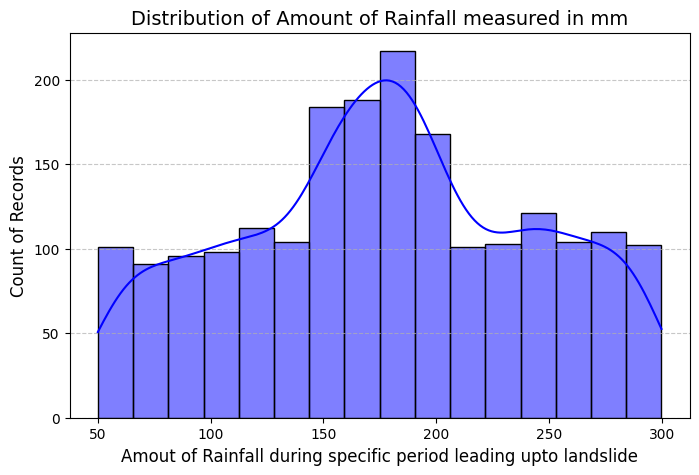

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(dataset['Rainfall_mm'], bins='auto', kde=True, color='blue')

plt.title('Distribution of Amount of Rainfall measured in mm', fontsize=14)
plt.xlabel('Amout of Rainfall during specific period leading upto landslide', fontsize=12)
plt.ylabel('Count of Records', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

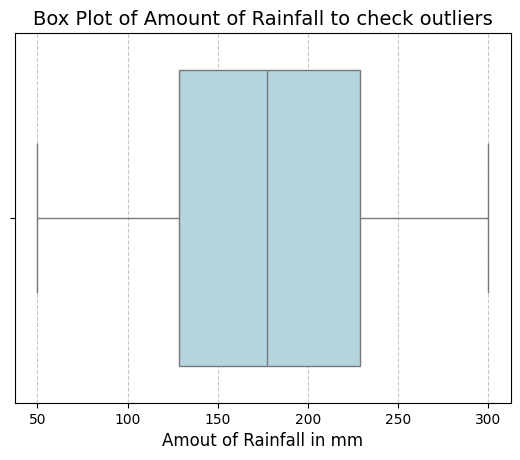

In [13]:
sns.boxplot(dataset['Rainfall_mm'], orient='h', color='lightblue')
plt.title('Box Plot of Amount of Rainfall to check outliers', fontsize=14)
plt.xlabel('Amout of Rainfall in mm', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

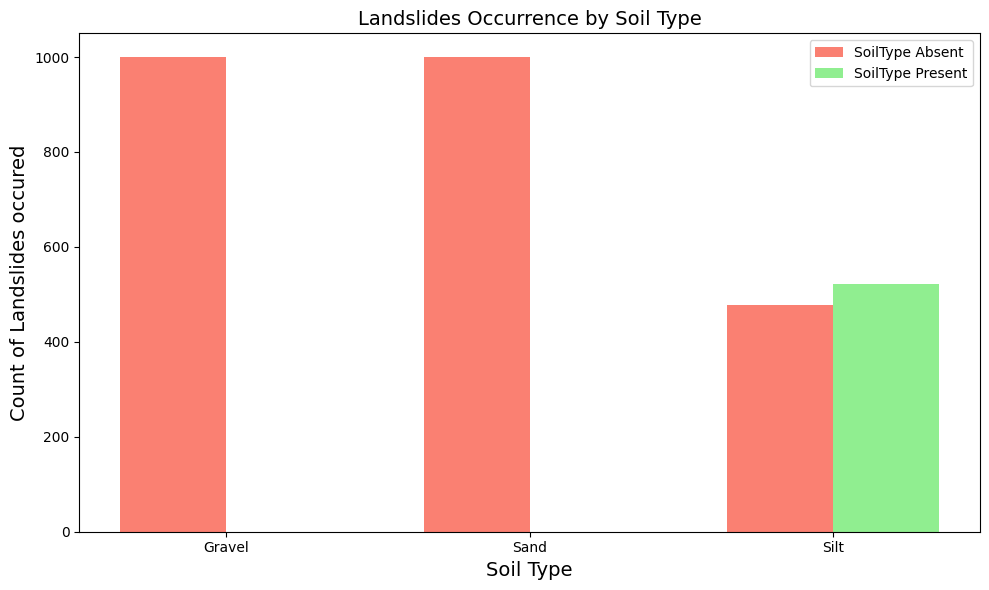

In [14]:
# Function to count landslides for each soil type (0 and 1)
def count_landslides_by_soil_type(df, soil_column):
  """
  Counts the number of landslides for each soil type (0 and 1).

  Parameters:
  df (pandas.DataFrame): The dataset containing the information about landslides and soil types.
  soil_column (str): The name of the column in the DataFrame representing the soil type (either 0 or 1).

  Returns:
  tuple: A tuple containing two integers:
          - The count of landslides for soil type 0.
          - The count of landslides for soil type 1.
  """
  soilType_0 = df[(df[soil_column] == 0) & (df['Landslide'] == 1)].shape[0]
  soilType_1 = df[(df[soil_column] == 1) & (df['Landslide'] == 1)].shape[0]
  return soilType_0, soilType_1


# List of soil types
soil_columns = ['Soil_Type_Gravel', 'Soil_Type_Sand', 'Soil_Type_Silt']

# Prepare data for plotting
landslide_in_soilType_0_values = []
landslides_in_soilType_1_values = []
soil_labels = []

for soil in soil_columns:
    soilType_0, soilType_1 = count_landslides_by_soil_type(dataset, soil)
    landslide_in_soilType_0_values.append(soilType_0)
    landslides_in_soilType_1_values.append(soilType_1)
    soil_labels.append(soil[10:])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(soil_columns))

bar1 = ax.bar(index, landslide_in_soilType_0_values, bar_width, label='SoilType Absent', color='salmon')
bar2 = ax.bar([i + bar_width for i in index], landslides_in_soilType_1_values, bar_width, label='SoilType Present', color='lightgreen')

# Labels and title
ax.set_xlabel('Soil Type', fontsize=14)
ax.set_ylabel('Count of Landslides occured', fontsize=14)
ax.set_title('Landslides Occurrence by Soil Type', fontsize=14)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(soil_labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Linear Regression From Scratch


##Helper Functions

###Cost Function
Cost function is the average of the loss function measured across the data points. For a regression problem, we will use the **Mean Squared Error (MSE)** as the cost function, which is given by:

$$
L(w) = \frac{1}{2n} \sum_{i=1}^{n} \left( \hat{y}_i - y_i \right)^2
$$

Where:
- $$(\hat{y}_i = \text{Transpose}(W) \cdot X )$$


In [15]:
def cost_function(X, Y, W):
  """ Parameters:
  This function finds the Mean Square Error.
  Input parameters:
  X: Feature Matrix
  Y: Target Matrix
  W: Weight Matrix
  Output Parameters:
  cost: accumulated mean square error.
  """
  n = len(X)

  Y_Pred = np.dot(X, W)

  sum_squared_error = np.sum((Y_Pred - Y) ** 2)

  cost = (sum_squared_error) / (2 * n)
  return cost

###Gradient Descent Implementation

1. **Calculate the predicted values using the current parameters:**

   $$ Y_{\text{pred}} = w_1 \cdot X $$

2. **Compute the loss function:**

   $$ \text{loss} = Y_{\text{pred}} - Y $$

3. **Compute the gradients for each parameter:**

   $$ dw_1 = \frac{\sum (\text{loss} \cdot X)}{m} $$

4. **Update the parameters:**

   $$ w_1 = w_1 - \alpha \cdot dw_1 $$

Repeat steps 1-4 for the specified number of iterations or until convergence.


In [16]:
def gradient_descent(X, Y, W, alpha, iterations):
  """
  Perform gradient descent to optimize the parameters of a linear regression model.
  Parameters:
  X (numpy.ndarray): Feature matrix (m x n).
  Y (numpy.ndarray): Target vector (m x 1).
  W (numpy.ndarray): Initial guess for parameters (n x 1).
  alpha (float): Learning rate.
  iterations (int): Number of iterations for gradient descent.
  Returns:
  tuple: A tuple containing the final optimized parameters (W_update) and the history of cost values
  .
  W_update (numpy.ndarray): Updated parameters (n x 1).
  cost_history (list): History of cost values over iterations.
  """
  # Initialize cost history
  cost_history = [0] * iterations
  # Number of samples
  m = len(Y)
  tolerance = 1e-6  # Small threshold for convergence
  # Initialize W_Update
  W_update = W
  for iteration in range(iterations):
      # Step 1: Hypothesis Values
      Y_pred = np.dot(X, W_update)
      # Step 2: Difference between Hypothesis and Actual Y
      loss = Y_pred - Y
      # Step 3: Gradient Calculation
      dw = (1 / m) * np.dot(X.T, loss)
      # Step 4: Updating Values of W using Gradient
      W_update = W_update - alpha * dw
      # Step 5: New Cost Value
      cost = cost_function(X, Y, W_update)
      cost_history[iteration] = cost
      # Check for convergence
      if iteration > 0 and abs(cost_history[iteration] - cost_history[iteration - 1]) < tolerance:
        print(f"Converged after {iteration} iterations")
        break
  return W_update, cost_history

### Root Mean Squared Error (RMSE)

Root Mean Squared Error (RMSE) is the square root of the average of the squared differences between the predicted and actual values.

The formula for RMSE is:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \hat{y}_i - y_i \right)^2}
$$

Where:
- $ \hat{y}_i $ is the predicted value for the $i^{\text{th}}$ data point
- $ y_i $ is the actual value for the $i^{\text{th}}$ data point
- $ n $ is the total number of data points




In [17]:
def rmse(Y, Y_pred):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
  Y: Array of actual(Target) Dependent Varaibles.
  Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
  rmse: Root Mean Square.
  """
  # Root Mean Square Error
  rmse = np.sqrt(np.mean((Y - Y_pred) ** 2))
  return rmse

### R-Squared (R²) Error

R-Squared (R²) value closer to 1 indicates that the model explains a large portion of the variance in the data, while a value closer to 0 indicates that the model does not explain much of the variance.

The formula for R-Squared is:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}{\sum_{i=1}^{n} \left( y_i - \bar{y} \right)^2}
$$

Where:
- $ \hat{y}_i $ is the predicted value for the $i^{\text{th}}$ data point
- $ y_i $ is the actual value for the $i^{\text{th}}$ data point
- $ \bar{y} $ is the mean of the actual values
- $ n $ is the total number of data points

R² is useful because it provides a simple way to assess how well the regression model fits the data and whether it has predictive power.


In [18]:
def r2(Y, Y_pred):
  """
  This Function calculates the R Squared Error.

  Input Arguments:
  Y: Array of actual(Target) Dependent Varaibles.
  Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
  rsquared: R Squared Error.
  """
  mean_y = np.mean(Y)

  ss_tot = np.sum((Y - mean_y) ** 2)

  ss_res = np.sum((Y - Y_pred) ** 2)

  r2 = 1 - (ss_res / ss_tot)

  return r2

### Train-Test Split

- **Training Set**: A portion of the dataset used to train the model.
- **Test Set**: A portion of the dataset used to evaluate the model's performance.



In [19]:
def custom_train_test_split(input_matrix, output_array, test_size=0.3, random_state = 42):
  """
  Splits dataset into 4 parts input_matrix_train, input_matrix_test, output_array_train, output_array_test

  Parameters:
  input_matrix (np.ndarray): Feature matrix
  output_array (np.ndarray): Label vector
  test_proportion (float): proportion of dataset to include test split (0 < test_proportion < 1)
  random_seed (int) : seed for reproducibility

  Returns:
  input_matrix_train (np.ndarray): Training feature matrix
  input_matrix_test (np.ndarray): Testing feature matrix
  output_array_train (np.ndarray): Training label vector
  output_array_test (np.ndarray): Testing label vector
  """
  # Setting a random seed for reproducibility
  np.random.seed(random_state)

  # Listing out all of the indices of feature matrix
  indices = np.arange(input_matrix.shape[0])

  # Shuffling indices to be randomly oriented
  np.random.shuffle(indices)

  # Calculating size of test according to proportion
  test_split_size = int(len(input_matrix) * test_size)

  # Separatring indices of test and indices of train
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]

  # Storing train and test data according to indices (Perform the train-test split)
  input_matrix_train = input_matrix[train_indices]
  input_matrix_test = input_matrix[test_indices]
  output_array_train = output_array[train_indices]
  output_array_test = output_array[test_indices]

  return input_matrix_train, input_matrix_test, output_array_train, output_array_test

### Min-Max Scaling

Min-Max scaling is a normalization technique used to scale the features of a dataset to a fixed range, usually [0, 1].

The formula for Min-Max scaling is:

$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

Where:
- $ X $ is the original value of the feature
- $ X_{\text{min}} $ is the minimum value of the feature
- $ X_{\text{max}} $ is the maximum value of the feature



In [20]:
# Manually implement Min-Max Scaling
def min_max_scaling(X):
  """
  Scales the feature matrix X using Min-Max scaling to the range [0, 1].

  Parameters:
  X (numpy array): Feature matrix (2D numpy array)

  Returns:
  X_scaled (numpy array): Scaled feature matrix
  """
  # Calculate min and max values for each feature (column)
  X_min = np.min(X, axis=0)
  X_max = np.max(X, axis=0)

  # Apply Min-Max scaling to each feature (column)
  X_scaled = (X - X_min) / (X_max - X_min)

  return X_scaled

## Model Build
Putting together Helper Functions

In [21]:
# Step 1: Prepare Features (X) and Target (Y)
X = dataset.drop('Rainfall_mm', axis=1).values
y = dataset['Rainfall_mm'].values.reshape(-1,1) # Convert to column vector

# Step 2: Manually scale features using Min-Max scaling
X_scaled = min_max_scaling(X)  # Apply manual scaling (make sure this function works correctly)

# Step 3: Split the data (80% train, 20% test)
X_train, X_test, Y_train, Y_test = custom_train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Initialize weights (W), learning rate, and number of iterations
W = np.zeros((X_train.shape[1],1))  # Initialize weights (shape corrected)
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations for gradient descent

# Step 5: Perform Gradient Descent
W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)

# Step 6: Make predictions on the test set
Y_pred = np.dot(X_test, W_optimal)

# Step 7: Evaluate the model using RMSE and R-Squared
model_rmse = rmse(Y_test, Y_pred)
model_r2 = r2(Y_test, Y_pred)

# Step 8: Output the results
print("Final Weights:", W_optimal)
print("Cost History (First 10 iterations):", cost_history[:10])  # Display first 10 iterations
print("\nRMSE on Test Set:", model_rmse)
print("R-Squared on Test Set:", model_r2)


Final Weights: [[45.45406361]
 [58.46545873]
 [37.71781911]
 [59.6883408 ]
 [41.89693218]
 [71.72997314]
 [24.46224055]
 [19.29182635]
 [14.5517872 ]]
Cost History (First 10 iterations): [17141.612911095446, 16556.415466542225, 15992.630140566742, 15449.473206683886, 14926.189626240763, 14422.05199829429, 13936.359547928925, 13468.437151607486, 13017.634398199361, 12583.324684380186]

RMSE on Test Set: 45.32966851531895
R-Squared on Test Set: 0.5304075440959098


#Primary Model

In [22]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
file_path = "landslide_dataset.csv"

# Retrieve dataset from kaggle
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "rajumavinmar/landslide-dataset",
    file_path
)

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop('Rainfall_mm', axis=1)
y = df['Rainfall_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initializing models
model_1 = LinearRegression()
model_2 = RandomForestRegressor(random_state=42)

# Fitting the models
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

# Predictions
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)

# Performance evaluation
mae_1 = mean_absolute_error(y_test, y_pred_1)
rmse_1 = mean_squared_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)

mae_2 = mean_absolute_error(y_test, y_pred_2)
rmse_2 = mean_squared_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)

# Output the results
print(f"Evaluation of Linear Regression: \n1. MAE = {mae_1} \n2. RMSE = {rmse_1} \n3. R2 = {r2_1} \n")
print(f"Evaluation of Random Forest Regressor: \n1. MAE = {mae_2} \n2. RMSE = {rmse_2} \n3. R2 = {r2_2}")

Evaluation of Linear Regression: 
1. MAE = 36.47243465044319 
2. RMSE = 1836.2768762695102 
3. R2 = 0.5803432719735991 

Evaluation of Random Forest Regressor: 
1. MAE = 36.96084815200242 
2. RMSE = 1885.823213428052 
3. R2 = 0.5690201136817584


#Hyper-parameter Optimization with Cross-Validation

In [25]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for LinearRegression
param_grid_lr = {
    'fit_intercept': [True, False]
}


# Perform GridSearch for Linear Regression
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_train, y_train)

# Get the best parameters
best_params_lr = grid_search_lr.best_params_

print("Best hyperparameters for LinearRegression:")

for parameter, parameter_value in best_params_lr.items():
  print(f"{parameter}: {parameter_value}\n")


# Hyperparameter grids
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearch for Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Best parameters for RandomForestRegressor
best_params_rf = grid_search_rf.best_params_

print("Best parameters for RandomForestRegressor: \n")

for parameter, parameter_value in best_params_rf.items():
  print(f"{parameter}: {parameter_value}")

Best hyperparameters for LinearRegression:
fit_intercept: True

Best parameters for RandomForestRegressor: 

max_depth: 5
min_samples_split: 10
n_estimators: 100


#Feature Selection with Recursive Feature Elimination (RFE)

In [26]:
from sklearn.feature_selection import RFE

# Initializing RandomForestRegressor for RFE
rfe_rf = RandomForestRegressor(**best_params_rf, random_state=42)

# Fit RFE on RandomForestRegressor
selector_rf = RFE(rfe_rf, n_features_to_select=6)  # Choose top 6 features
X_train_rfe_rf = selector_rf.fit_transform(X_train, y_train)

# Selected features for RandomForestRegressor
selected_features_rf = X.columns[selector_rf.support_]
print("Selected features for RandomForestRegressor:")
for feature in selected_features_rf:
    print(f"- {feature}")

print("\n")

# Initializing LinearRegression for RFE
rfe_lr = LinearRegression()

# Fit RFE on LinearRegression
selector_lr = RFE(rfe_lr, n_features_to_select=6)  # Choose top 6 features
X_train_rfe_lr = selector_lr.fit_transform(X_train, y_train)

# Selected features for LinearRegression
selected_features_lr = X.columns[selector_lr.support_]
print("Selected features for LinearRegression:")
for feature in selected_features_lr:
  print(f"- {feature}")


Selected features for RandomForestRegressor:
- Slope_Angle
- Soil_Saturation
- Vegetation_Cover
- Earthquake_Activity
- Proximity_to_Water
- Landslide


Selected features for LinearRegression:
- Soil_Saturation
- Vegetation_Cover
- Proximity_to_Water
- Landslide
- Soil_Type_Gravel
- Soil_Type_Sand


#Final Model

In [27]:
# Rebuilding LinearRegression model with selected features
final_model_lr = LinearRegression(fit_intercept=True) # Best Hyperparamter
final_model_lr.fit(X_train_rfe_lr, y_train)

# Predictions on test data
X_test_rfe_lr = selector_lr.transform(X_test)

y_pred_lr = final_model_lr.predict(X_test_rfe_lr)

# Performance evaluation of final models
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Evaluation of Final Model :\n Linear Regression with optimized parameters obtained from GridSearch and feature selected using Recursive Feature Elimination\n")

print("Mean Absolute Error : ", mae_lr)
print("Root Mean Squared Error : ", rmse_lr)
print("R square Score : ", r2_lr)


Evaluation of Final Model :
 Linear Regression with optimized parameters obtained from GridSearch and feature selected using Recursive Feature Elimination

Mean Absolute Error :  36.415657313911304
Root Mean Squared Error :  1825.6453557610762
R square Score :  0.5827729649943918


---
# Regression Model Performance Evaluation


## Initial Model Performance

### **Linear Regression**
- **Mean Absolute Error (MAE):** 36.4724  
- **Root Mean Squared Error (RMSE):** 1836.2769  
- **R² Score:** 0.5803  

### **Random Forest Regressor**
- **Mean Absolute Error (MAE):** 36.9608  
- **Root Mean Squared Error (RMSE):** 1885.8232  
- **R² Score:** 0.5690  

> **Observation:**  
> - Linear Regression performed slightly better than Random Forest in terms of RMSE and R² score.
> - Both models had similar MAE values, indicating comparable absolute error in predictions.

---

## Hyperparameter Tuning

### **Optimized Parameters**
#### **Linear Regression:**
- `fit_intercept: True`

#### **Random Forest Regressor:**
- `max_depth: 5`
- `min_samples_split: 10`
- `n_estimators: 100`

---

## Feature Selection

### **Selected Features**
#### **For RandomForestRegressor:**
- `Slope_Angle`
- `Soil_Saturation`
- `Vegetation_Cover`
- `Earthquake_Activity`
- `Proximity_to_Water`
- `Landslide`

#### **For Linear Regression:**
- `Soil_Saturation`
- `Vegetation_Cover`
- `Proximity_to_Water`
- `Landslide`
- `Soil_Type_Gravel`
- `Soil_Type_Sand`

> **Observation:**  
> - Both models retained **Soil_Saturation, Vegetation_Cover, Proximity_to_Water,** and **Landslide** as important features.
> - **Linear Regression** selected categorical soil types, while **Random Forest** focused on numerical variables like `Slope_Angle` and `Earthquake_Activity`.

---

## Final Model Performance

### **Optimized Linear Regression**
- **Mean Absolute Error (MAE):** 36.4157  
- **Root Mean Squared Error (RMSE):** 1825.6454  
- **R² Score:** 0.5828  

> **Conclusion:**  
> - After hyperparameter tuning and feature selection, **Linear Regression improved slightly** (RMSE reduced, R² increased).   
> - Further improvements could involve **feature engineering, polynomial regression, or ensemble models** for better generalization.
